## Task 4 -1

In [48]:
from tasks import task4
task4()

Task 4
LASSO result (first 10 weights):
[[-0.83523016]
 [ 1.4477958 ]
 [-0.05249997]
 [ 0.58009811]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]]


## Task 4-2

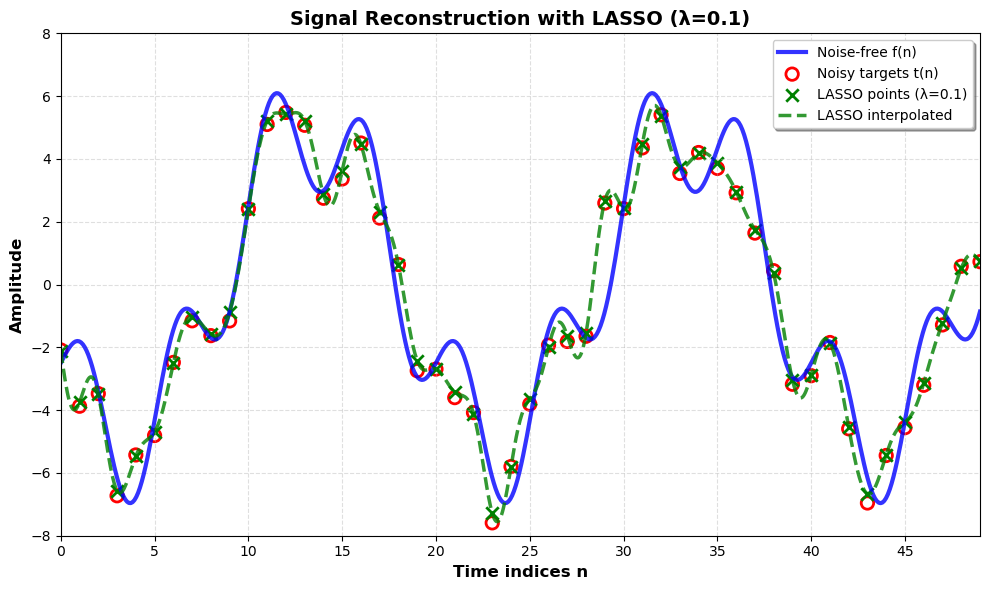

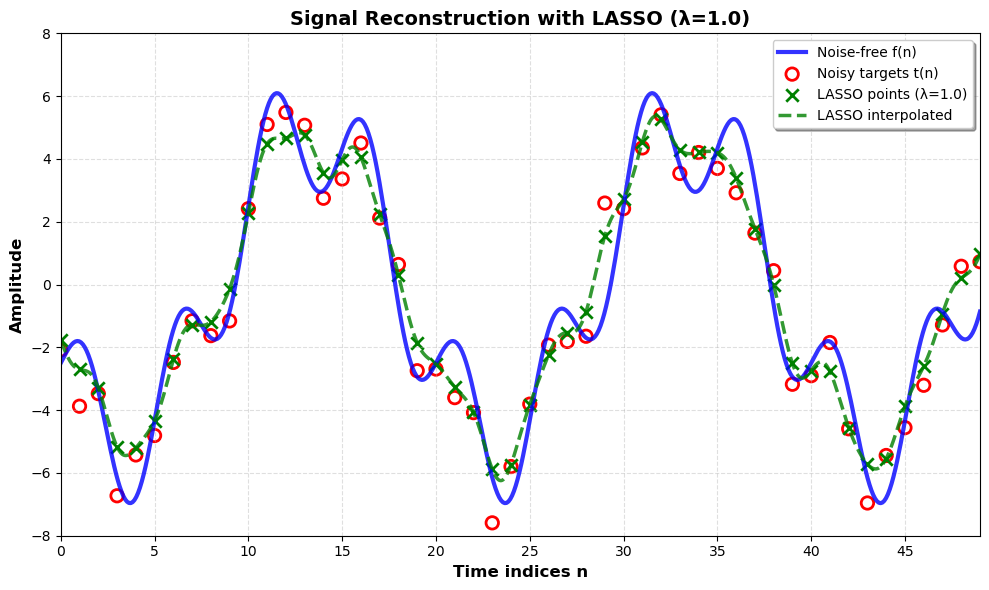

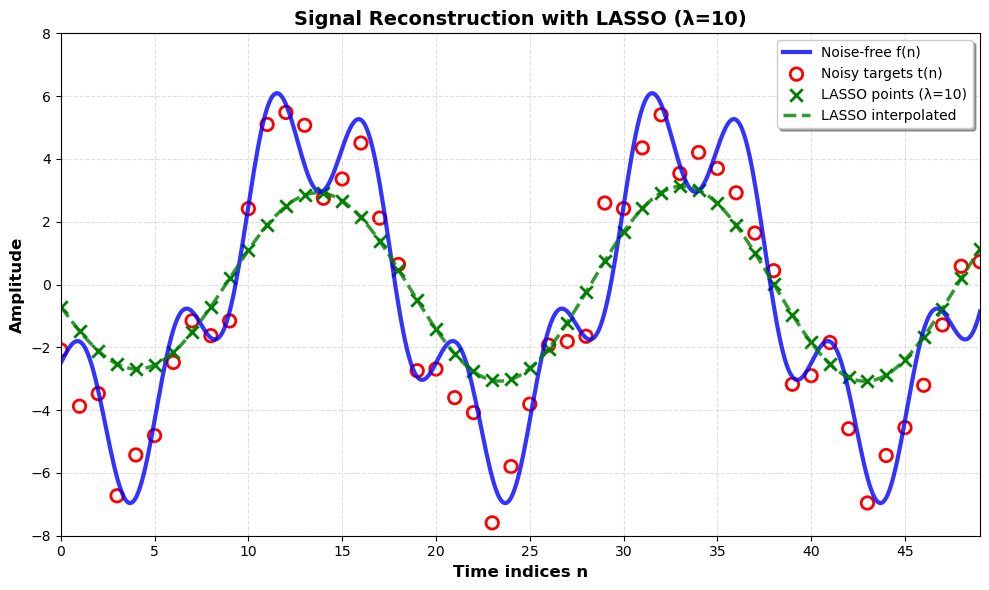

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat

# Load data
data = loadmat("A1_data.mat")
t = data["t"].flatten()
X = data["X"]
Xinterp = data["Xinterp"]
n = np.arange(50)
ninterp = data["ninterp"].flatten()

# Calculate high-resolution noise-free signal
n_highres = np.linspace(0, 49, 500)
f_highres = np.real(5 * np.exp(1j*2*np.pi*(n_highres/20 + 1/3)) + \
                   np.real(2 * np.exp(1j*2*np.pi*(n_highres/5 - 1/4))))

# Common plot settings
plot_style = {
    'figsize': (10, 6),
    'xlim': (0, 49),
    'ylim': (-8, 8),
    'xticks': np.arange(0, 50, 5),
    'yticks': np.arange(-8, 9, 2),
    'grid_style': {'linestyle': '--', 'alpha': 0.4},
    'font_settings': {'fontsize': 12, 'fontweight': 'bold'},
    'title_font': {'fontsize': 14, 'fontweight': 'bold'}
}

# Generate plots for each lambda
for lambda_val in [0.1, 1.0, 10]:
    plt.figure(figsize=plot_style['figsize'])
    
    # Compute LASSO solution
    w_hat = lasso_ccd(t.reshape(-1,1), X, lambda_val)
    y = (X @ w_hat).flatten()
    y_interp = (Xinterp @ w_hat).flatten()
    
    # 1. Reference signal
    plt.plot(n_highres, f_highres, 'b-', linewidth=3, alpha=0.8, 
            label='Noise-free f(n)')
    
    # 2. Noisy observations
    plt.scatter(n, t, marker='o', facecolors='none', edgecolors='r',
              s=80, linewidth=2, label='Noisy targets t(n)')
    
    # 3. LASSO points
    plt.scatter(n, y, marker='x', color='green', s=80,
              linewidth=2, label=f'LASSO points (λ={lambda_val})')
    
    # 4. LASSO interpolated
    plt.plot(ninterp, y_interp, 'g--', linewidth=2.5, alpha=0.8,
            label='LASSO interpolated')
    
    # Formatting
    plt.xlim(plot_style['xlim'])
    plt.ylim(plot_style['ylim'])
    plt.xticks(plot_style['xticks'])
    plt.yticks(plot_style['yticks'])
    plt.xlabel('Time indices n', **plot_style['font_settings'])
    plt.ylabel('Amplitude', **plot_style['font_settings'])
    plt.title(f'Signal Reconstruction with LASSO (λ={lambda_val})', 
             **plot_style['title_font'])
    
    # Grid and legend
    plt.grid(**plot_style['grid_style'])
    legend = plt.legend(loc='upper right', fontsize=10,
                      framealpha=1, shadow=True)
    legend.get_frame().set_facecolor('white')
    
    plt.tight_layout()
    plt.savefig(f'LASSO_reconstruction_lambda_{lambda_val}.png', 
               dpi=300, bbox_inches='tight')
    plt.show()

## Task 4-3

In [22]:
non_zero_counts = {}
for lambda_val in [0.1, 1.0, 10]:
    w_hat = lasso_ccd(t.reshape(-1,1), X, lambda_val)
    non_zero = np.sum(w_hat != 0)
    non_zero_counts[lambda_val] = non_zero
    print(f"λ = {lambda_val}: {non_zero}   Non-Zero Weights")

λ = 0.1: 234   Non-Zero Weights
λ = 1.0: 64   Non-Zero Weights
λ = 10: 7   Non-Zero Weights


## Task 5-1

Task 5 - Optimal λ: 1.6103


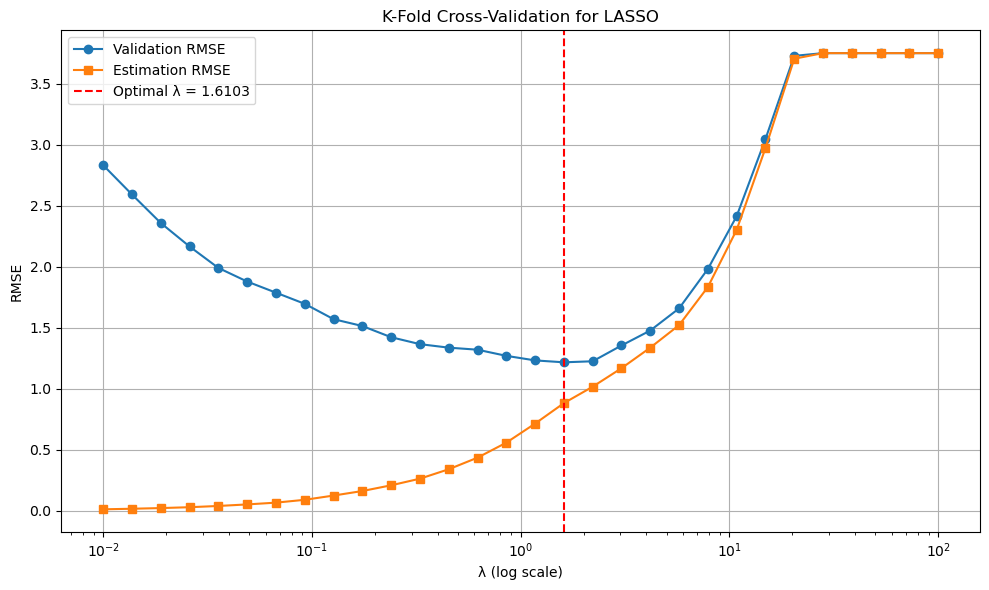

In [1]:
from tasks import task5
task5()

## Task 5-2

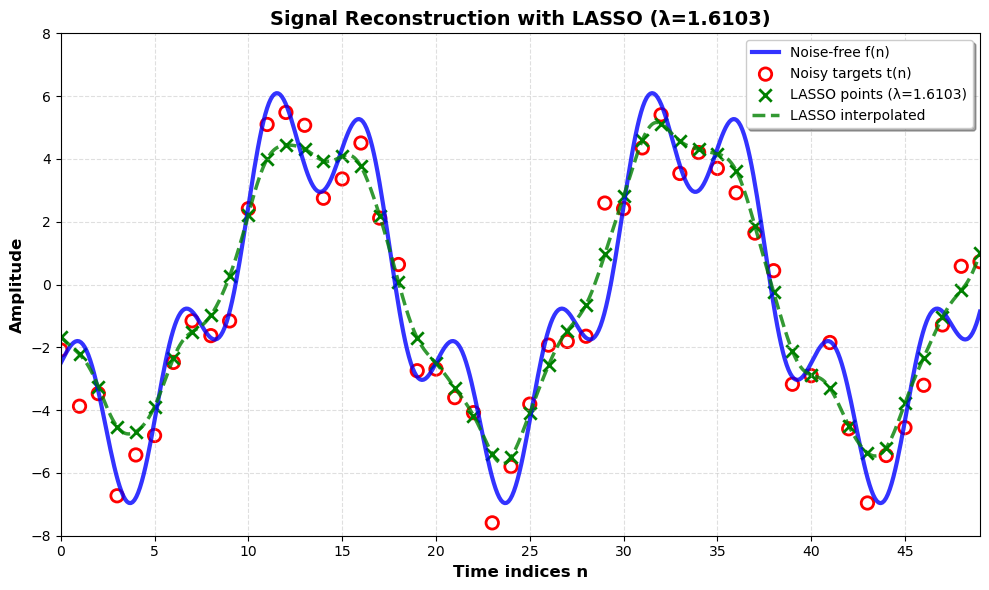

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from lasso import lasso_ccd

data = loadmat("A1_data.mat")
t = data["t"].flatten()
X = data["X"]
Xinterp = data["Xinterp"]
n = np.arange(50)
ninterp = data["ninterp"].flatten()

n_highres = np.linspace(0, 49, 500)
f_highres = np.real(5 * np.exp(1j*2*np.pi*(n_highres/20 + 1/3)) + 
                    2 * np.exp(1j*2*np.pi*(n_highres/5 - 1/4)))

lambda_opt = 1.6103
w_hat = lasso_ccd(t.reshape(-1, 1), X, lambda_opt)
y = (X @ w_hat).flatten()
y_interp = (Xinterp @ w_hat).flatten()

plt.figure(figsize=(10, 6))
plt.plot(n_highres, f_highres, 'b-', linewidth=3, alpha=0.8, label='Noise-free f(n)')
plt.scatter(n, t, facecolors='none', edgecolors='r', s=80, linewidths=2, label='Noisy targets t(n)')
plt.scatter(n, y, marker='x', color='green', s=80, linewidths=2, label=f'LASSO points (λ={lambda_opt})')
plt.plot(ninterp, y_interp, 'g--', linewidth=2.5, alpha=0.8, label='LASSO interpolated')

plt.xlim(0, 49)
plt.ylim(-8, 8)
plt.xticks(np.arange(0, 50, 5))
plt.yticks(np.arange(-8, 9, 2))
plt.xlabel("Time indices n", fontsize=12, fontweight='bold')
plt.ylabel("Amplitude", fontsize=12, fontweight='bold')
plt.title(f"Signal Reconstruction with LASSO (λ={lambda_opt})", fontsize=14, fontweight='bold')
plt.grid(linestyle='--', alpha=0.4)

legend = plt.legend(loc='upper right', fontsize=10, framealpha=1, shadow=True)
legend.get_frame().set_facecolor('white')

plt.tight_layout()
plt.savefig(f"LASSO_reconstruction_lambda_{lambda_opt}.png", dpi=300, bbox_inches='tight')
plt.show()


In [3]:
from scipy.io import loadmat
import numpy as np

data = loadmat("A1_data.mat")

Ttrain = data["Ttrain"]
Ttest = data["Ttest"]
Xaudio = data["Xaudio"]

print("Ttrain shape:", Ttrain.shape)
print("Ttest shape:", Ttest.shape)
print("Xaudio shape:", Xaudio.shape)


Ttrain shape: (19404, 1)
Ttest shape: (24697, 1)
Xaudio shape: (352, 2000)


In [4]:
def split_into_frames(signal, frame_length):
    n_samples = signal.shape[0]
    n_frames = n_samples // frame_length
    signal = signal[:n_frames * frame_length]
    frames = signal.reshape((n_frames, frame_length))
    return frames

frame_length = Xaudio.shape[0]
train_frames = split_into_frames(Ttrain, frame_length)

print("Number of frames:", train_frames.shape[0])
print("Each frame shape:", train_frames.shape[1])


Number of frames: 55
Each frame shape: 352


In [11]:
import numpy as np
from scipy.io import loadmat
from sklearn.linear_model import LassoCV
import sounddevice as sd

# 1. بارگذاری داده‌ها
data = loadmat("A1_data.mat")
Ttrain = data["Ttrain"].flatten()
Ttest = data["Ttest"].flatten()
Xaudio = data["Xaudio"]
fs = data["fs"][0,0]

# 2. تقسیم به فریم‌های 352 تایی
def split_into_frames(signal, frame_length):
    n_samples = len(signal)
    n_frames = n_samples // frame_length
    return signal[:n_frames * frame_length].reshape((n_frames, frame_length))

frame_length = Xaudio.shape[0]
train_frames = split_into_frames(Ttrain, frame_length)
test_frames = split_into_frames(Ttest, frame_length)

# 3. آموزش مدل و انتخاب λ بهینه (با 5-fold CV)
lasso = LassoCV(alphas=np.logspace(-4, 1, 50), cv=5, max_iter=10000)
lasso.fit(Xaudio, train_frames[0])  # استفاده از اولین فریم برای آموزش
optimal_lambda = lasso.alpha_
print(f"Optimal lambda: {optimal_lambda}")

# 4. پردازش تمام فریم‌های آموزشی و تست
def denoise_frames(frames, X, lambda_opt):
    denoised = np.zeros_like(frames)
    for i in range(len(frames)):
        model = Lasso(alpha=lambda_opt, max_iter=10000)
        model.fit(X, frames[i])
        denoised[i] = model.predict(X)
    return denoised

denoised_train = denoise_frames(train_frames, Xaudio, optimal_lambda)
denoised_test = denoise_frames(test_frames, Xaudio, optimal_lambda)

# 5. تبدیل فریم‌ها به سیگنال پیوسته
def merge_frames(frames):
    return frames.flatten()

clean_train = merge_frames(denoised_train)
clean_test = merge_frames(denoised_test)

# 6. پخش و ذخیره نتایج
sd.play(clean_test, fs)
np.save("denoised_audio.npy", clean_test)

Optimal lambda: 0.0001


In [13]:
import sounddevice as sd

# پخش سیگنال اصلی (نویزی)
print("در حال پخش سیگنال اصلی با نویز...")
sd.play(Ttest, fs)
sd.wait()  # منتظر پایان پخش

# پخش سیگنال بازسازی شده
print("در حال پخش سیگنال بازسازی شده...")
sd.play(clean_test, fs)
sd.wait()

در حال پخش سیگنال اصلی با نویز...
در حال پخش سیگنال بازسازی شده...


In [28]:
print("Ttest shape:", Ttest.shape)
print("clean_test shape:", clean_test.shape)

Ttest shape: (24640,)
clean_test shape: (24640,)


In [26]:
import numpy as np

def calculate_snr(original, denoised):
    min_length = min(len(original), len(denoised))
    original = original[:min_length]
    denoised = denoised[:min_length]
    noise = original - denoised
    snr = 10 * np.log10(np.sum(original**2) / (np.sum(noise**2) + 1e-10))
    return snr

def calculate_rmse(original, denoised):
    min_length = min(len(original), len(denoised))
    original = original[:min_length]
    denoised = denoised[:min_length]
    return np.sqrt(np.mean((original - denoised)**2))

# مثال استفاده:
snr = calculate_snr(Ttest, clean_test)
rmse = calculate_rmse(Ttest, clean_test)
print(f"SNR: {snr:.2f} dB")
print(f"RMSE: {rmse:.4f}")

SNR: 8.83 dB
RMSE: 0.0070


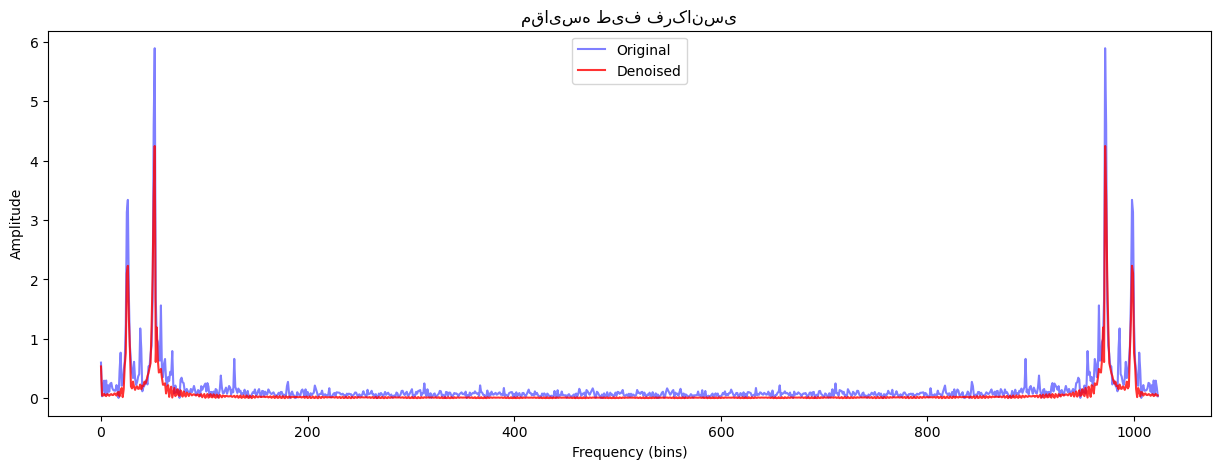

In [17]:
from scipy.fft import fft

# محاسبه FFT
freq_original = np.abs(fft(Ttest[:1024]))
freq_denoised = np.abs(fft(clean_test[:1024]))

# رسم
plt.figure(figsize=(15, 5))
plt.plot(freq_original, 'b-', alpha=0.5, label='Original')
plt.plot(freq_denoised, 'r-', alpha=0.8, label='Denoised')
plt.xlabel('Frequency (bins)')
plt.ylabel('Amplitude')
plt.legend()
plt.title("مقایسه طیف فرکانسی")
plt.show()

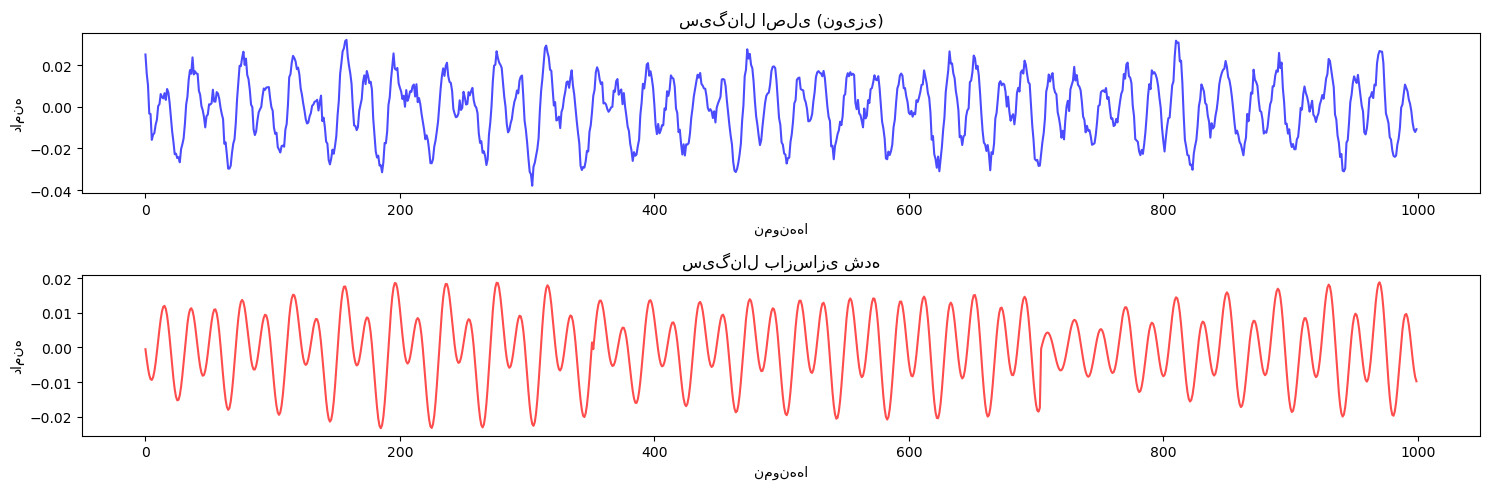

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

# سیگنال اصلی
plt.subplot(2, 1, 1)
plt.plot(Ttest[:1000], 'b-', alpha=0.7)
plt.title("سیگنال اصلی (نویزی)")
plt.xlabel("نمونه‌ها")
plt.ylabel("دامنه")

# سیگنال پردازش شده
plt.subplot(2, 1, 2)
plt.plot(clean_test[:1000], 'r-', alpha=0.7)
plt.title("سیگنال بازسازی شده")
plt.xlabel("نمونه‌ها")
plt.ylabel("دامنه")

plt.tight_layout()
plt.show()

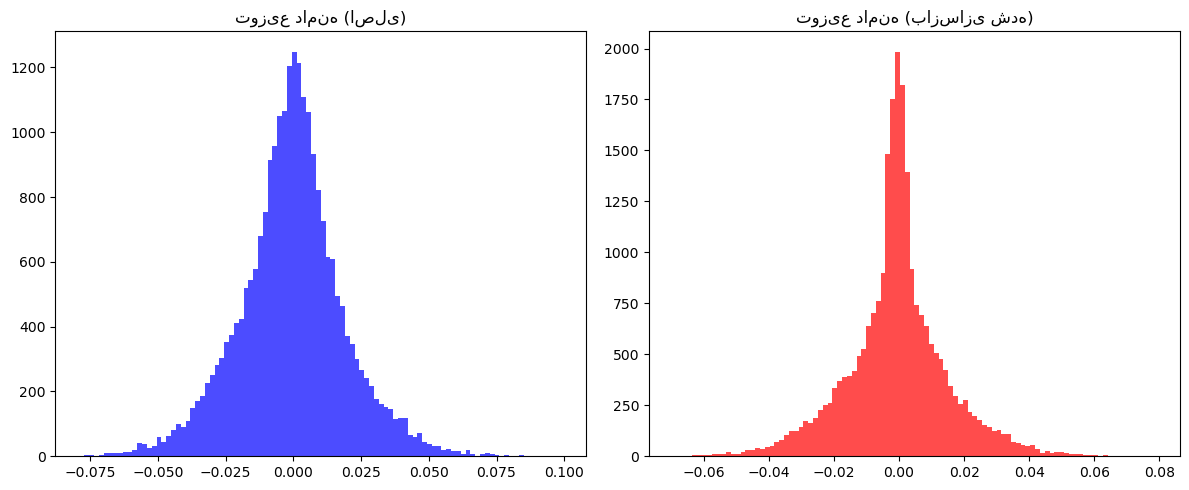

In [19]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(Ttest, bins=100, color='b', alpha=0.7)
plt.title("توزیع دامنه (اصلی)")

plt.subplot(1, 2, 2)
plt.hist(clean_test, bins=100, color='r', alpha=0.7)
plt.title("توزیع دامنه (بازسازی شده)")

plt.tight_layout()
plt.show()

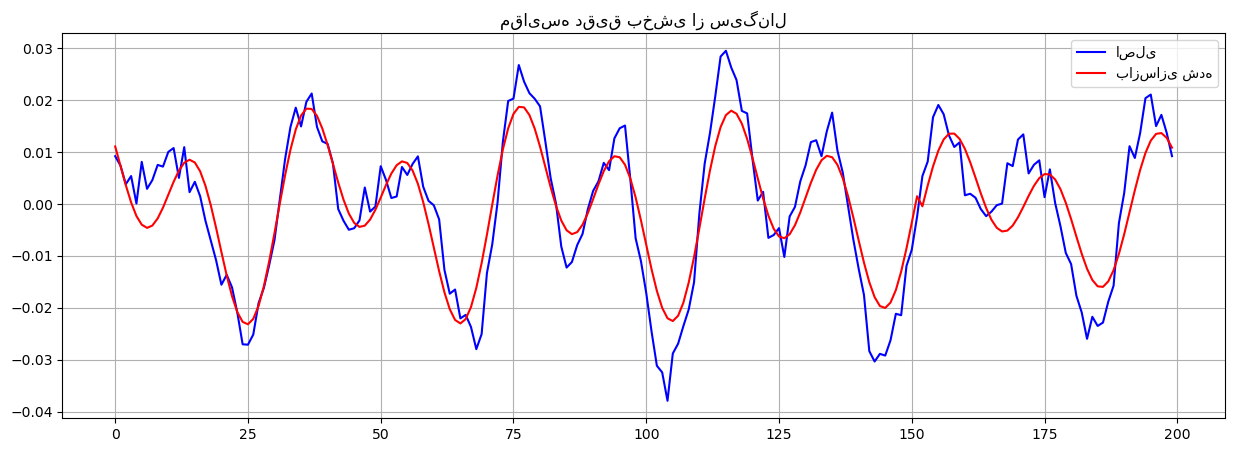

In [20]:
plt.figure(figsize=(15, 5))
plt.plot(Ttest[200:400], 'b-', label='اصلی')
plt.plot(clean_test[200:400], 'r-', label='بازسازی شده')
plt.title("مقایسه دقیق بخشی از سیگنال")
plt.legend()
plt.grid()
plt.show()